<a href="https://colab.research.google.com/github/niedakaito/EU_M_Math/blob/main/Chap02_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# chapter 2-1 データ分析で使うライブラリ

In [1]:
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 小数第3位まで表示という意味
%precision 3

'%.3f'

# chapter 2-2 Numpyの基礎

In [2]:
# 配列の作成
data = np.array([9, 2, 3, 4, 10, 6, 7, 8, 1, 5])
display(data)

array([ 9,  2,  3,  4, 10,  6,  7,  8,  1,  5])

In [3]:
# データの型
display(data.dtype)

dtype('int64')

In [4]:
print('次元数：', data.ndim)
print('要素数：', data.size)

次元数： 1
要素数： 10


In [5]:
# それぞれの数字を係数倍
display(data*2)

array([18,  4,  6,  8, 20, 12, 14, 16,  2, 10])

In [6]:
print('掛け算：', np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) * np.array([10, 9, 8, 7, 6, 5, 4, 3, 2, 1]))
print('累乗：', np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) ** 2)
print('割り算：', np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) / np.array([10, 9, 8, 7, 6, 5, 4, 3, 2, 1]))

掛け算： [10 18 24 28 30 30 28 24 18 10]
累乗： [  1   4   9  16  25  36  49  64  81 100]
割り算： [ 0.1    0.222  0.375  0.571  0.833  1.2    1.75   2.667  4.5   10.   ]


In [7]:
# 現在の値を表示
print('そのまま：', data)
# ソートした結果を表示
data.sort()
print('ソート後：', data)

そのまま： [ 9  2  3  4 10  6  7  8  1  5]
ソート後： [ 1  2  3  4  5  6  7  8  9 10]


In [8]:
data[::-1].sort()
print('ソート後：', data)

ソート後： [10  9  8  7  6  5  4  3  2  1]


In [9]:
# 最小値
print('Min：', data.min())
# 最大値
print('Max：', data.max())
# 合計
print('Sum：', data.sum())
# 積み上げ
print('Cum：', data.cumsum())
# 積み上げ割合
print('Ratio：', data.cumsum() / data.sum())

Min： 1
Max： 10
Sum： 55
Cum： [10 19 27 34 40 45 49 52 54 55]
Ratio： [0.182 0.345 0.491 0.618 0.727 0.818 0.891 0.945 0.982 1.   ]


In [10]:
random.seed(0)
# 正規分布（平均0、分散1）の乱数を10個発生
rnd_data = random.randn(10)
print('乱数10個の配列：', rnd_data)

乱数10個の配列： [ 1.764  0.4    0.979  2.241  1.868 -0.977  0.95  -0.151 -0.103  0.411]


In [11]:
# ランダム抽出
print('10個を抽出（重複有、復元抽出）:', random.choice(data, 10))
print('10個を抽出（重複無、非復元抽出）：', random.choice(data, 10, replace = False))

10個を抽出（重複有、復元抽出）: [4 3 3 2 9 5 1 2 1 6]
10個を抽出（重複無、非復元抽出）： [ 6  9  4  3  8  2  5  1 10  7]


In [12]:
# Nは乱数の発生数、10の6乗
N = 10**6

In [13]:
# Python版（以下のrange(N)は0からN-1までの整数を用意しています。
# 「_」は代入した値を参照しないときに使う慣例的な変数名です。
# 例えば、for a in range(N)ト書くのと同じですが、aと書くと、
# そのあとでを後で使うように見えるので、その値を参照しないときは、
# for _ in range(N)のように慣例的に書く書き方です。
normal_data = [random.random() for _ in range(N)]

# Numpy版
numpy_random_data = np.array(normal_data)

# calc time : 合計値
# 普通の処理
%timeit sum(normal_data)

# Numpyを使った処理
%timeit np.sum(numpy_random_data)

18.1 ms ± 2.34 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
770 µs ± 192 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [14]:
print('連続した整数（0-8）:', np.arange(9))

連続した整数（0-8）: [0 1 2 3 4 5 6 7 8]


In [15]:
array1 = np.arange(9).reshape(3, 3)
print(array1)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


In [16]:
print('1行目:', array1[0, :])
print('1列目：', array1[:, 0])

1行目: [0 1 2]
1列目： [0 3 6]


In [17]:
array2 = np.arange(9, 18).reshape(3,3)
print(array2)

[[ 9 10 11]
 [12 13 14]
 [15 16 17]]


In [18]:
print('行列の積：', np.dot(array1, array2))
print('要素同士の積：', array1 * array2)

行列の積： [[ 42  45  48]
 [150 162 174]
 [258 279 300]]
要素同士の積： [[  0  10  22]
 [ 36  52  70]
 [ 90 112 136]]


In [19]:
print(np.zeros((2, 3), dtype = np.int64))
print(np.ones((2, 3), dtype = np.int64))

[[0 0 0]
 [0 0 0]]
[[1 1 1]
 [1 1 1]]


# chapter 2-3 Scipyの基礎

In [20]:
# 線形代数用のライブラリ
import scipy.linalg as linalg

# 最適化計算（最小値）用の関数
from scipy.optimize import minimize_scalar

In [21]:
matrix = np.array([[1, -1, -1], [-1, 1, -1], [-1, -1, 1]])

# 行列式
print('行列式')
print(linalg.det(matrix))

行列式
-4.0


In [22]:
# 逆行列
print('逆行列')
print(linalg.inv(matrix))

逆行列
[[ 0.  -0.5 -0.5]
 [-0.5 -0.  -0.5]
 [-0.5 -0.5  0. ]]


In [23]:
# 固有値と固有ベクトル
eig_value, eig_vector = linalg.eig(matrix)

# 固有値と固有ベクトル
print('固有値')
print(eig_value)
print('固有ベクトル')
print(eig_vector)

固有値
[-1.+0.j  2.+0.j  2.+0.j]
固有ベクトル
[[ 0.577  0.816  0.408]
 [ 0.577 -0.408 -0.816]
 [ 0.577 -0.408  0.408]]


In [24]:
# 関数の定義
def my_functiom(x):
  return (x**2 + 2*x + 1)

# ニュートン法の読み込み
from scipy.optimize import newton

# 計算実行
print(newton(my_functiom,0))

-0.9999999852953906


In [25]:
# 計算の実行
print(minimize_scalar(my_functiom, method = 'Brent'))

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: 0.0
       x: -1.0000000000000002
     nit: 4
    nfev: 8


# chapter 2-4 Pandasの基礎

In [26]:
# Series
sample_pandas_data = pd.Series([0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
print(sample_pandas_data)

0     0
1    10
2    20
3    30
4    40
5    50
6    60
7    70
8    80
9    90
dtype: int64


In [27]:
# indexをアルファベットでつける
sample_pandas_index_data = pd.Series(
    [0, 10, 20, 30, 40, 50, 60, 70, 80, 90],
    index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])
print(sample_pandas_index_data)

a     0
b    10
c    20
d    30
e    40
f    50
g    60
h    70
i    80
j    90
dtype: int64


In [28]:
print('データの値：', sample_pandas_index_data.values)
print('インデックスの値', sample_pandas_index_data.index)

データの値： [ 0 10 20 30 40 50 60 70 80 90]
インデックスの値 Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object')


In [29]:
attri_data1 = {'ID':['100', '101', '102', '103', '104'],
               'City':['Tokyo', 'Osaka', 'Kyoto', 'Hokkaido', 'Tokyo'],
               'Birth_year':[1990, 1989, 1992, 1997, 1982],
               'Name':['Hiroshi', 'Akira', 'Yuki', 'Satoru', 'Steve']}
attri_data_frame1 = DataFrame(attri_data1)
print(attri_data_frame1)

    ID      City  Birth_year     Name
0  100     Tokyo        1990  Hiroshi
1  101     Osaka        1989    Akira
2  102     Kyoto        1992     Yuki
3  103  Hokkaido        1997   Satoru
4  104     Tokyo        1982    Steve


In [30]:
attri_data_frame_index1 = DataFrame(attri_data1, index = ['a', 'b', 'c', 'd', 'e'])
print(attri_data_frame_index1)

    ID      City  Birth_year     Name
a  100     Tokyo        1990  Hiroshi
b  101     Osaka        1989    Akira
c  102     Kyoto        1992     Yuki
d  103  Hokkaido        1997   Satoru
e  104     Tokyo        1982    Steve


In [31]:
attri_data_frame_index1

,ID,City,Birth_year,Name
a,100,Tokyo,1990,Hiroshi
b,101,Osaka,1989,Akira
c,102,Kyoto,1992,Yuki
d,103,Hokkaido,1997,Satoru
e,104,Tokyo,1982,Steve


In [32]:
# 転置
attri_data_frame1.T

,0,1,2,3,4
ID,100,101,102,103,104
City,Tokyo,Osaka,Kyoto,Hokkaido,Tokyo
Birth_year,1990,1989,1992,1997,1982
Name,Hiroshi,Akira,Yuki,Satoru,Steve


In [33]:
# 列名の指定（1つの場合）
attri_data_frame1.Birth_year

0    1990
1    1989
2    1992
3    1997
4    1982
Name: Birth_year, dtype: int64

In [34]:
# 列名の指定（複数の場合）
attri_data_frame1[['ID', 'Birth_year']]

,ID,Birth_year
0,100,1990
1,101,1989
2,102,1992
3,103,1997
4,104,1982


In [35]:
# 条件（フィルター）
attri_data_frame1[attri_data_frame1['City'] == 'Tokyo' ]

,ID,City,Birth_year,Name
0,100,Tokyo,1990,Hiroshi
4,104,Tokyo,1982,Steve


In [36]:
attri_data_frame1['City'] == 'Tokyo'

0     True
1    False
2    False
3    False
4     True
Name: City, dtype: bool

In [37]:
# 条件（フィルター、複数の値）
attri_data_frame1[attri_data_frame1['City'].isin(['Tokyo', 'Osaka']) ]

,ID,City,Birth_year,Name
0,100,Tokyo,1990,Hiroshi
1,101,Osaka,1989,Akira
4,104,Tokyo,1982,Steve


# chapter 2-5 Matplotlibの基礎

In [38]:
# MatplotlibとSeabornの読み込み
# Seabornは綺麗に図示できる
import matplotlib as mpl
import seaborn as sns

# pyplotにはpltの別名で実行できるようにする
import matplotlib.pyplot as plt

# Jupyter Notebook上でグラフを表示させるために必要なマジックコマンド
%matplotlib inline

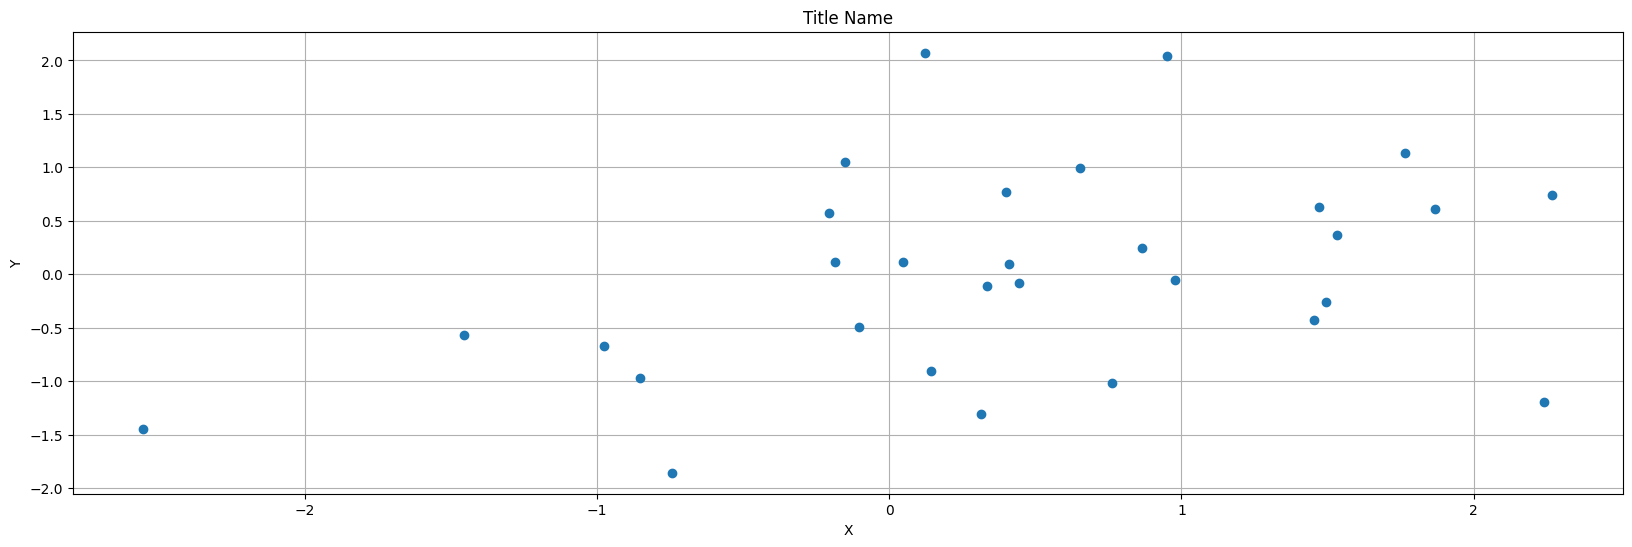

In [39]:
# 散布図

# シード値の固定
random.seed(0)

# x軸のデータ
x = np.random.randn(30)

# y軸のデータ
y = np.sin(x) + np.random.randn(30)

# グラフの大きさ指定（20や6を変更してみてください）
plt.figure(figsize=(20, 6))

# グラフの描写
plt.plot(x,y,'o')

# 以下でも散布図が描ける
# plt.scatter(x,y)

# タイトル
plt.title('Title Name')
# xの座標名
plt.xlabel('X')
# yの座標名
plt.ylabel('Y')

# grid（グラフの中にある縦線と横線）の表示
plt.grid(True)

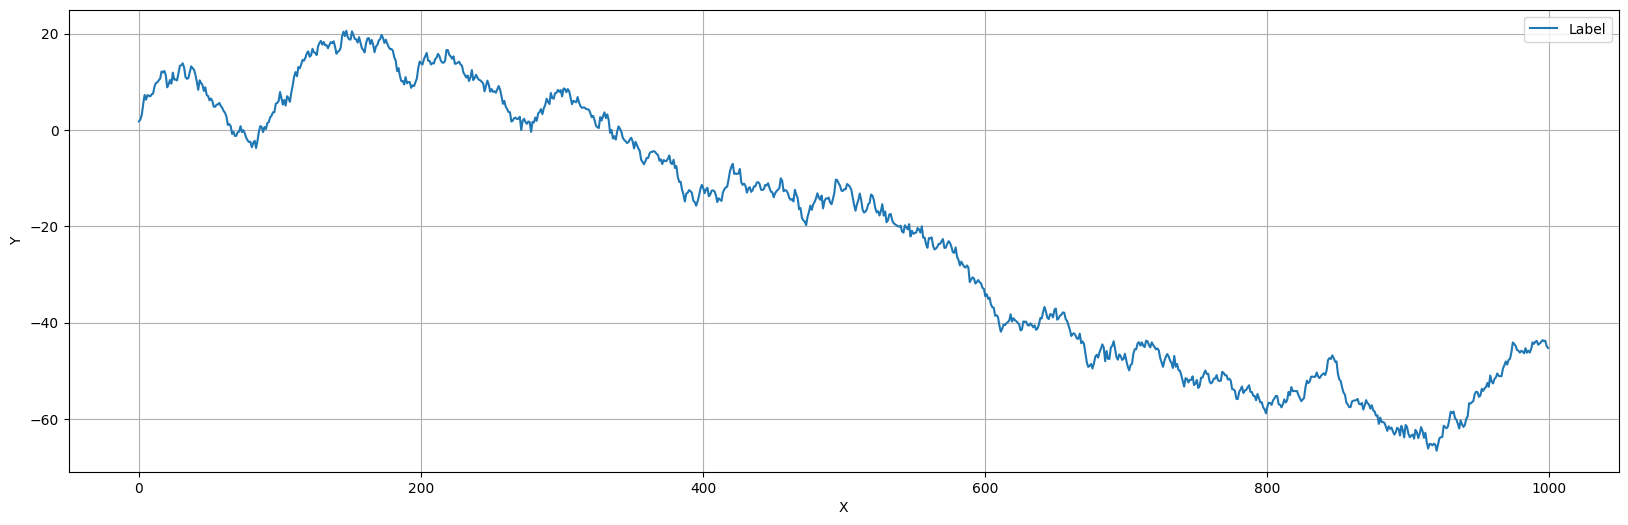

In [40]:
# 連続曲線

# シード値の指定
np.random.seed(0)

# データの範囲
numpy_data_x = np.arange(1000)

# 乱数の発生と積み上げ
numpy_random_data_y = np.random.randn(1000).cumsum()

# グラフの大きさを指定
plt.figure(figsize = (20, 6))

# label= と legend でラベルをつけることが可能
plt.plot(numpy_data_x, numpy_random_data_y, label = 'Label')

plt.legend()

plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)

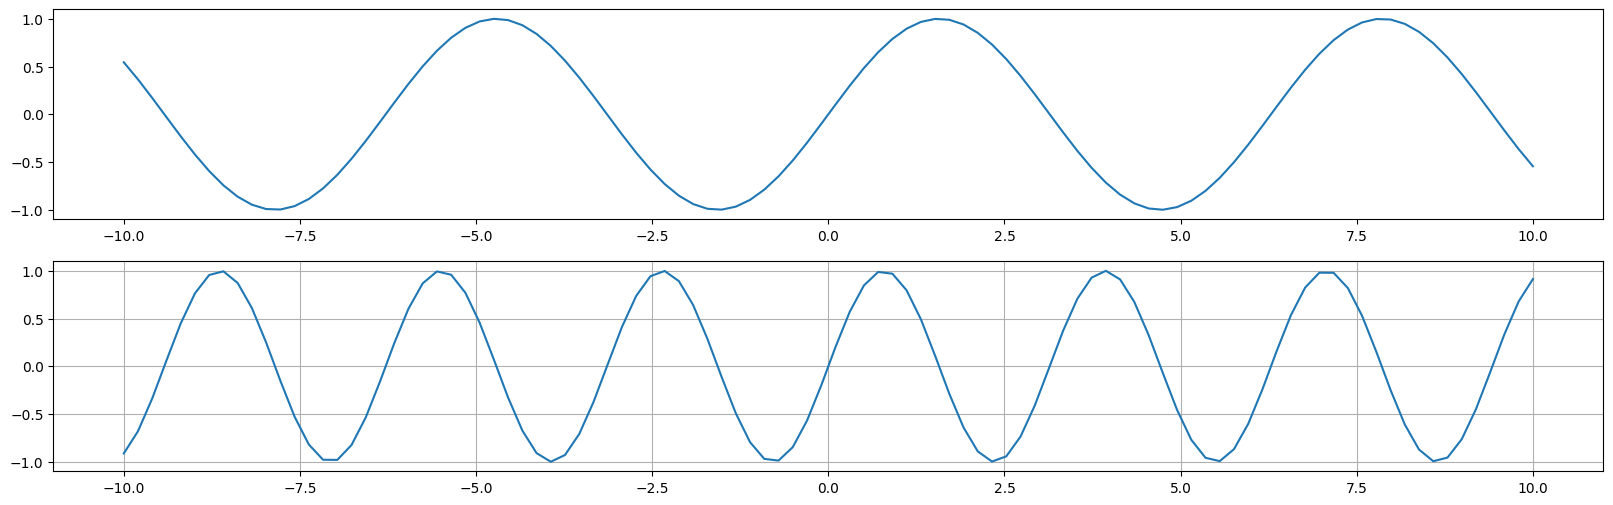

In [41]:
# グラフの大きさを指定
plt.figure(figsize = (20,6))

# 2行1列のグラフの1つ目
plt.subplot(2,1,1)
x = np.linspace(-10, 10,100)
plt.plot(x, np.sin(x))

# 2行1列のグラフの2つ目
plt.subplot(2,1,2)
y = np.linspace(-10, 10,100)
plt.plot(y, np.sin(2*y))

plt.grid(True)

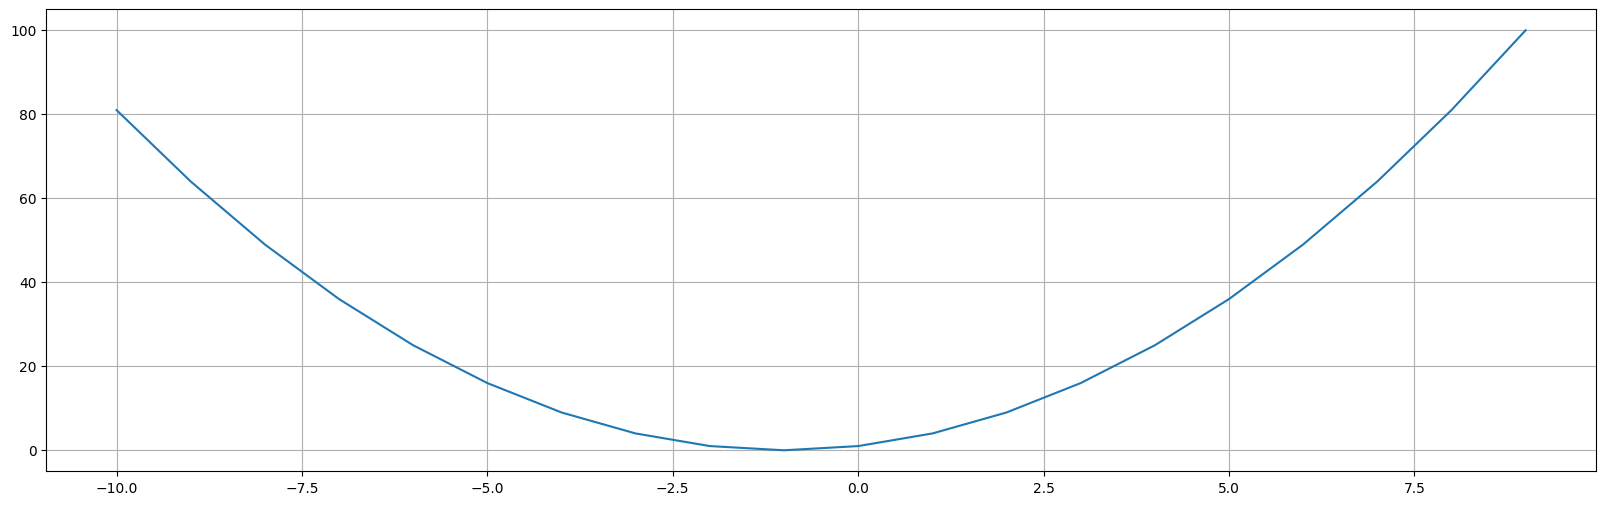

In [42]:
# 関数の定義（Ssipyで使った二次関数の例と同じ）
def my_function(x):
  return x**2 + 2*x + 1

x = np.arange(-10, 10)
plt.figure(figsize = (20, 6))
plt.plot(x, my_function(x))
plt.grid(True)

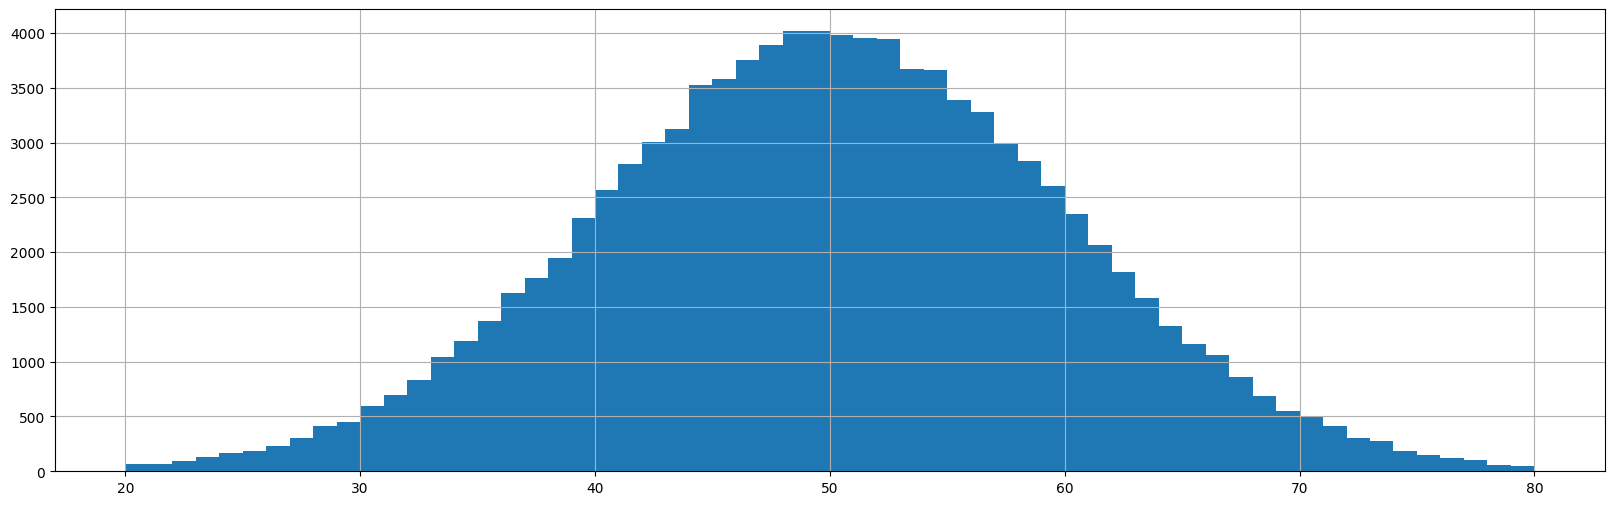

In [43]:
# シードの固定
random.seed(0)

# グラフの大きさを指定
plt.figure(figsize=(20, 6))

# ヒストグラムの描画
plt.hist(np.random.randn(10**5) * 10 + 50, bins = 60, range = (20, 80))

plt.grid(True)

In [44]:
?plt.hist